<a href="https://colab.research.google.com/github/DipalokSen/Developing-a-Hybrid-IDS-Combining-Random-Forest-and-Neural-Network-for-Improved-Cybersecurity/blob/main/Intrution_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
import numpy as np


In [3]:
df=pd.read_csv('/content/KDDTest.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class,num_learners
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [4]:
df.shape

(22544, 43)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.isnull().sum()


,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [7]:
numerical_summary = df.describe()

In [8]:
numerical_summary

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_learners
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [9]:
categorical_distribution = {col: df[col].value_counts() for col in df.select_dtypes(include='object').columns}

In [10]:
categorical_distribution

{'protocol_type': protocol_type
 tcp     18880
 udp      2621
 icmp     1043
 Name: count, dtype: int64,
 'service': service
 http       7853
 private    4774
 telnet     1626
 pop_3      1019
 smtp        934
            ... 
 printer      11
 ntp_u        10
 rje           8
 tim_i         6
 tftp_u        1
 Name: count, Length: 64, dtype: int64,
 'flag': flag
 SF        14875
 REJ        3850
 S0         2013
 RSTO        773
 RSTR        669
 S3          249
 SH           73
 S1           21
 S2           15
 OTH           4
 RSTOS0        2
 Name: count, dtype: int64,
 'attack_class': attack_class
 normal             9711
 neptune            4657
 guess_passwd       1231
 mscan               996
 warezmaster         944
 apache2             737
 satan               735
 processtable        685
 smurf               665
 back                359
 snmpguess           331
 saint               319
 mailbomb            293
 snmpgetattack       178
 portsweep           157
 ipsweep      

In [11]:
attack_class_distribution = df['attack_class'].value_counts()

In [12]:
attack_class_distribution

,count
attack_class,
normal,9711
neptune,4657
guess_passwd,1231
mscan,996
warezmaster,944
apache2,737
satan,735
processtable,685
smurf,665


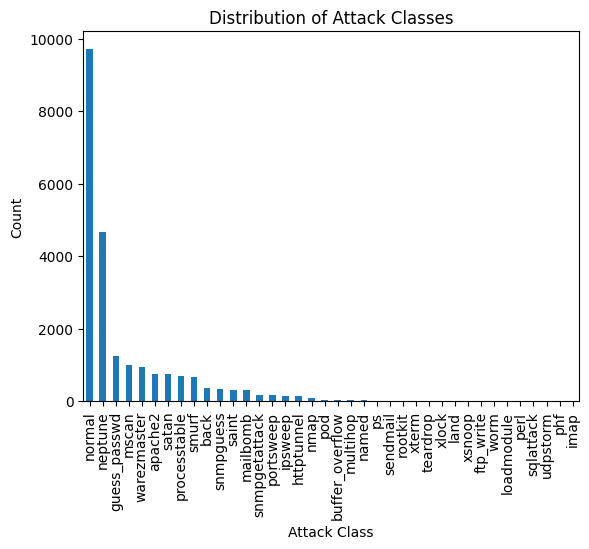

In [13]:
attack_class_distribution.plot(kind='bar')
plt.xlabel('Attack Class')
plt.ylabel('Count')
plt.title('Distribution of Attack Classes')
plt.show()

In [15]:
# Create a binary classification label in the dataset
# Set 'normal' as class 0 and all others as class 1
data_binary = df.copy()
data_binary['attack_class'] = data_binary['attack_class'].apply(lambda x: 0 if x == 'normal' else 1)

# Check distribution to confirm the transformation
binary_class_distribution = data_binary['attack_class'].value_counts()
binary_class_distribution


,count
attack_class,
1,12833
0,9711


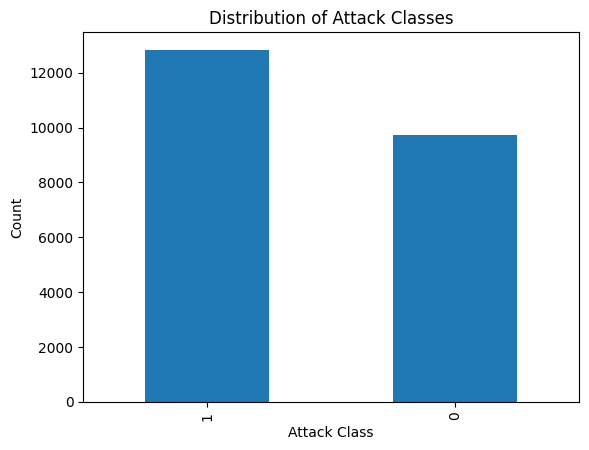

In [16]:

binary_attack_class_distribution = data_binary['attack_class'].value_counts()

binary_attack_class_distribution.plot(kind='bar')
plt.xlabel('Attack Class')
plt.ylabel('Count')
plt.title('Distribution of Attack Classes')
plt.show()

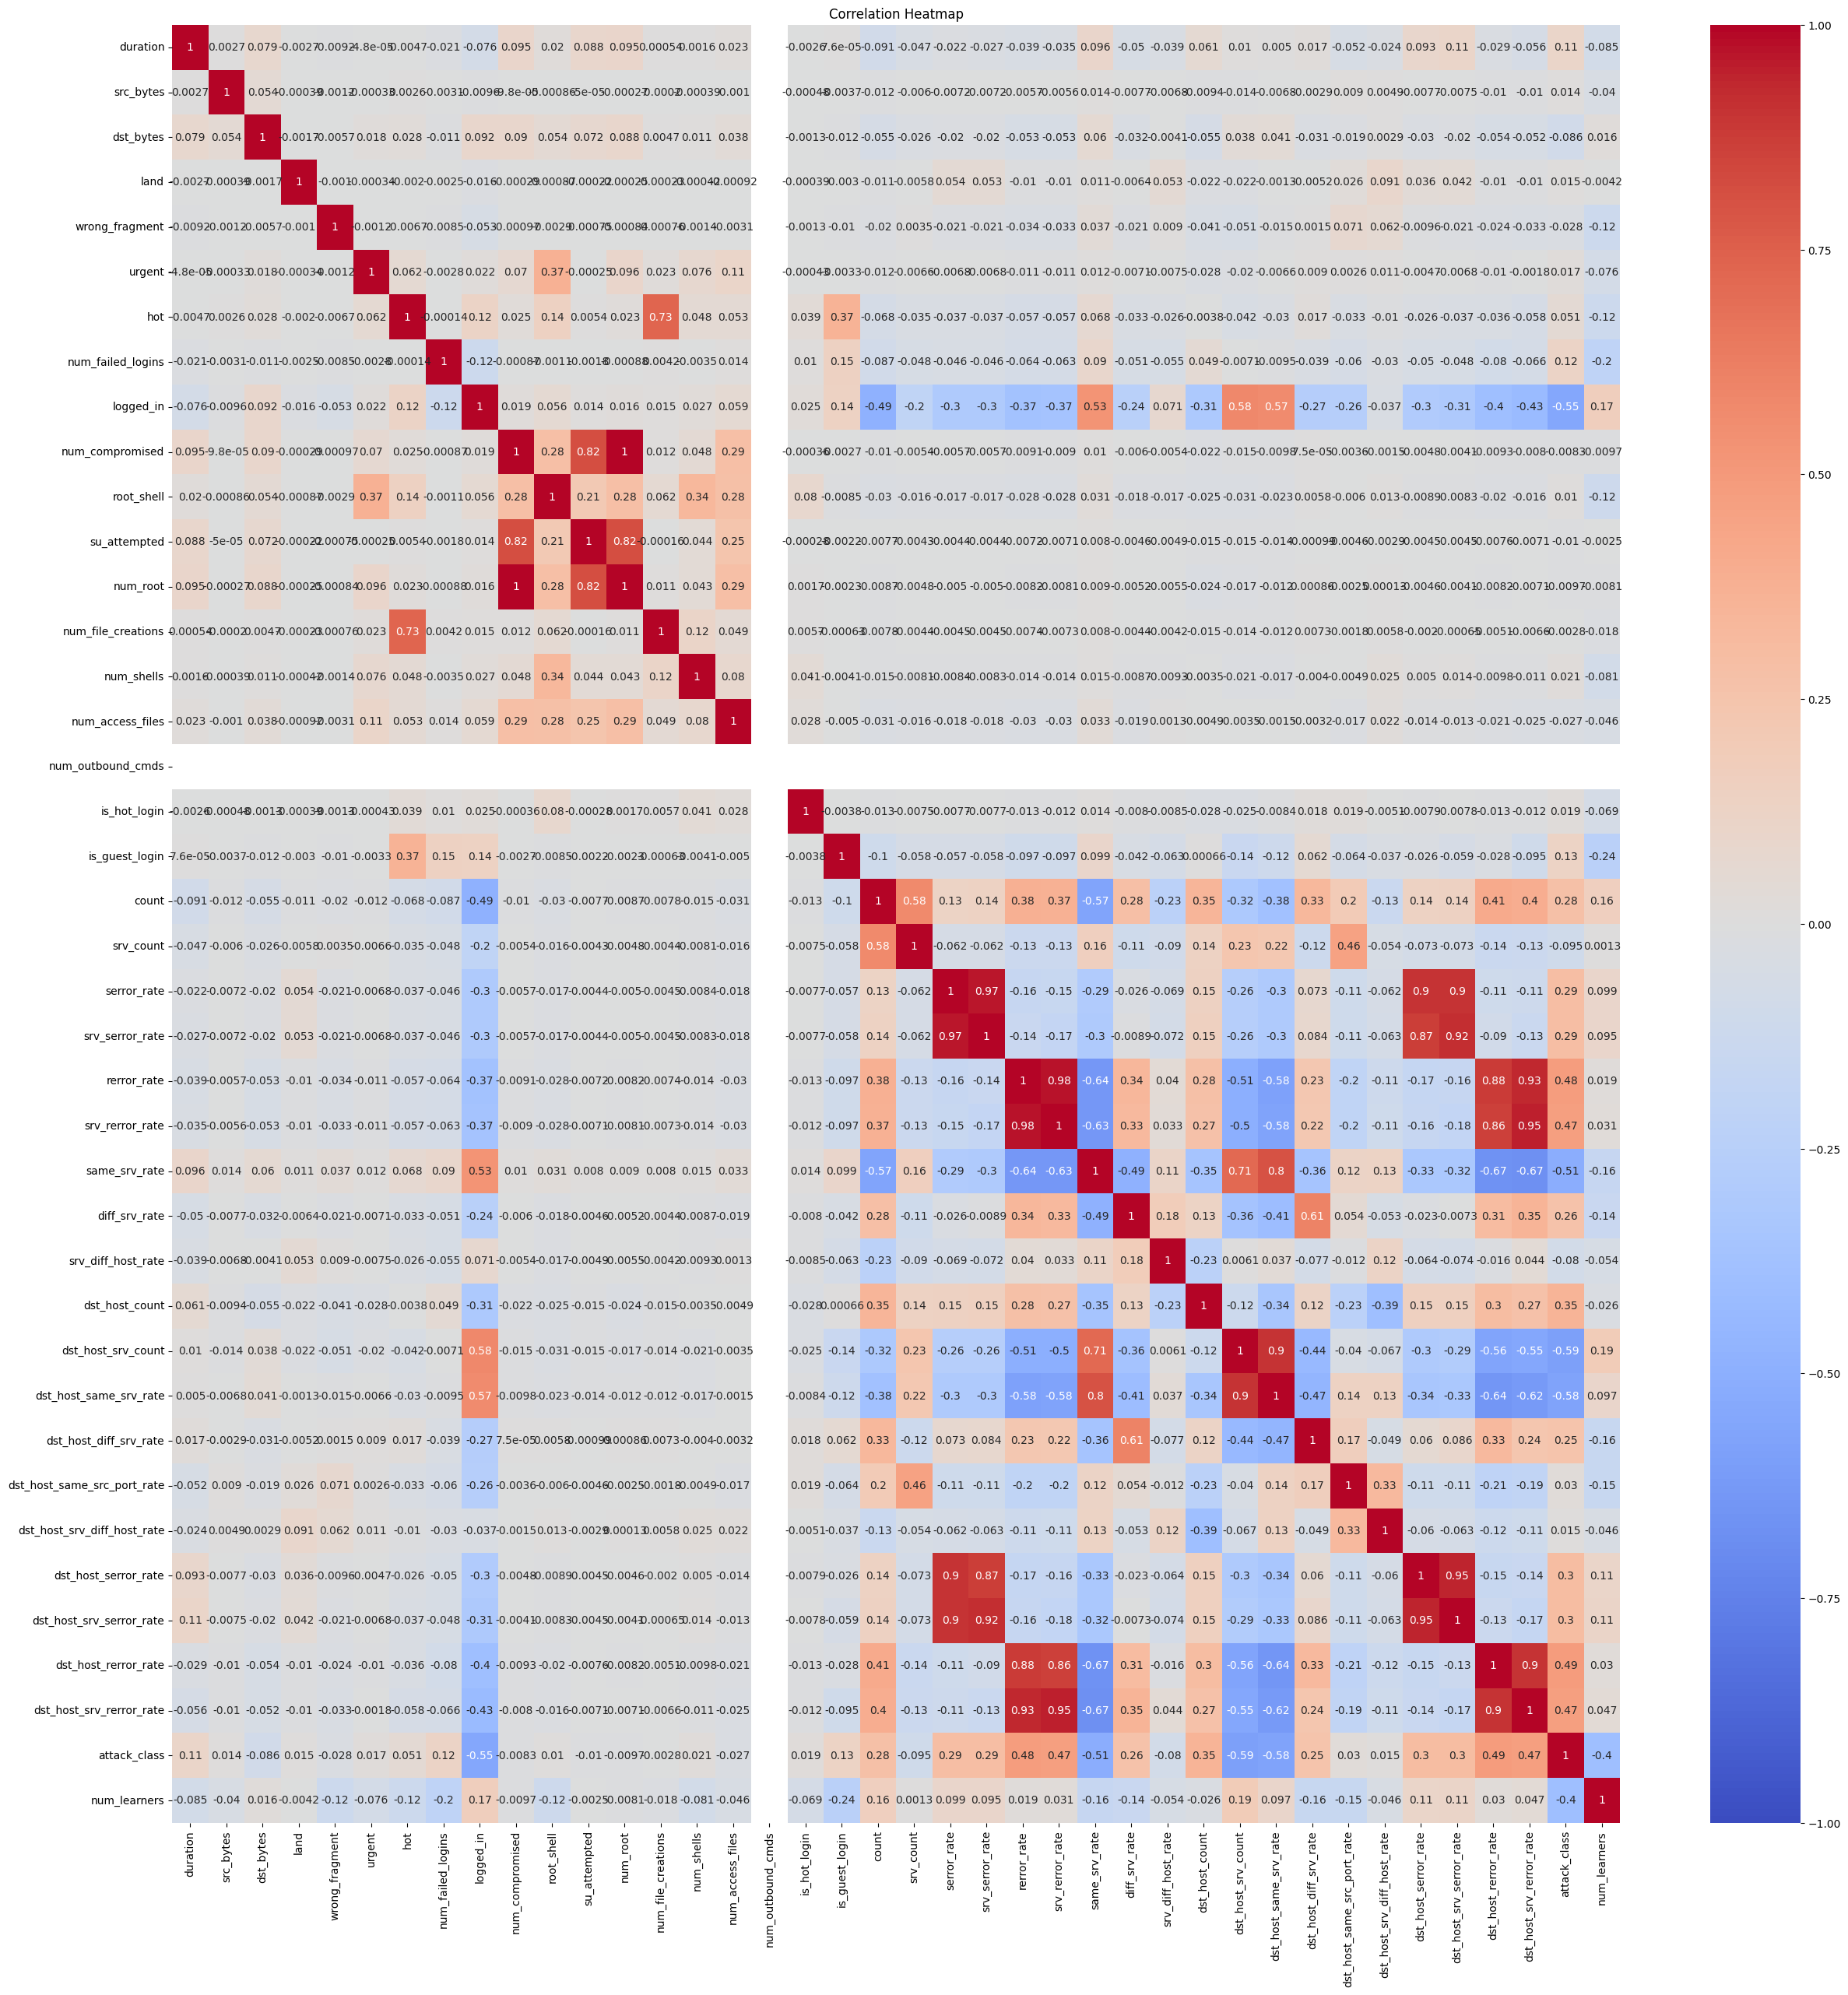

In [17]:
correlation_matrix = data_binary.select_dtypes(include=['number']).corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True,vmin=-1,vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
df = pd.get_dummies(df, columns=['protocol_type', 'service', 'flag'])


In [21]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
1,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
2,2,12983,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,0,20,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,1,0,15,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False


In [22]:
df['protocol_type_tcp']

,protocol_type_tcp
0,True
1,True
2,True
3,False
4,True
...,...
22539,True
22540,True
22541,True
22542,False


In [23]:
df['attack_class'] = df['attack_class'].apply(lambda x: 0 if x == 'normal' else 1)

In [25]:
X = df.drop('attack_class', axis=1)
y = df['attack_class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
important_features = np.argsort(rf.feature_importances_)[-20:]
X_train_rf_selected = X_train[:, important_features]
X_test_rf_selected = X_test[:, important_features]

In [32]:
nn_model = Sequential([
    Input(shape=(X_train_rf_selected.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [33]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_rf_selected, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9102 - loss: 0.2538 - val_accuracy: 0.9781 - val_loss: 0.0741
Epoch 2/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9821 - loss: 0.0640 - val_accuracy: 0.9850 - val_loss: 0.0484
Epoch 3/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9863 - loss: 0.0480 - val_accuracy: 0.9864 - val_loss: 0.0431
Epoch 4/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0368 - val_accuracy: 0.9881 - val_loss: 0.0377
Epoch 5/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9912 - loss: 0.0297 - val_accuracy: 0.9900 - val_loss: 0.0359
Epoch 6/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9904 - loss: 0.0298 - val_accuracy: 0.9897 - val_loss: 0.0342
Epoch 7/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9903 - loss: 0.0288 - val_accuracy: 0.9886 - val_loss: 0.0346
Epoch 8/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9905 - loss: 0.0272 - val_accuracy: 0.

In [34]:
nn_predictions = (nn_model.predict(X_test_rf_selected) > 0.5).astype("int32")
print(classification_report(y_test, nn_predictions))

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1925
           1       0.99      1.00      0.99      2584

    accuracy                           0.99      4509
   macro avg       0.99      0.99      0.99      4509
weighted avg       0.99      0.99      0.99      4509



### Approch 2

In [39]:
rf_probs_train = rf.predict_proba(X_train)[:, 1].reshape(-1, 1)
rf_probs_test = rf.predict_proba(X_test)[:, 1].reshape(-1, 1)

In [40]:
X_train_combined = np.concatenate((X_train, rf_probs_train), axis=1)
X_test_combined = np.concatenate((X_test, rf_probs_test), axis=1)

In [41]:
nn_model_combined = Sequential([
    Input(shape=(X_train_combined.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [43]:
nn_model_combined.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model_combined.fit(X_train_combined, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9996 - loss: 8.2533e-04 - val_accuracy: 0.9986 - val_loss: 0.0087
Epoch 2/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 - loss: 0.0025 - val_accuracy: 0.9992 - val_loss: 0.0035
Epoch 3/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - loss: 0.0055 - val_accuracy: 0.9986 - val_loss: 0.0044
Epoch 4/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9993 - loss: 0.0017 - val_accuracy: 0.9992 - val_loss: 0.0027
Epoch 5/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 7.0409e-04 - val_accuracy: 0.9992 - val_loss: 0.0025
Epoch 6/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9996 - loss: 0.0043 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 7/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 4.7257e-04 - val_accuracy: 0.9992 - val_loss: 0.0044
Epoch 8/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9999 - loss: 3.8837e-04 - 

In [44]:
nn_predictions_combined = (nn_model_combined.predict(X_test_combined) > 0.5).astype("int32")
print(classification_report(y_test, nn_predictions_combined))

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1925
           1       1.00      1.00      1.00      2584

    accuracy                           1.00      4509
   macro avg       1.00      1.00      1.00      4509
weighted avg       1.00      1.00      1.00      4509



In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Collect metrics for each model

# For Approach 1 (Random Forest Feature Selection + Neural Network)
accuracy1 = accuracy_score(y_test, nn_predictions)
precision1 = precision_score(y_test, nn_predictions)
recall1 = recall_score(y_test, nn_predictions)
f1_1 = f1_score(y_test, nn_predictions)

# For Approach 2 (Random Forest Initial Classifier + Neural Network)
accuracy2 = accuracy_score(y_test, nn_predictions_combined)
precision2 = precision_score(y_test, nn_predictions_combined)
recall2 = recall_score(y_test, nn_predictions_combined)
f1_2 = f1_score(y_test, nn_predictions_combined)

# Create a DataFrame to store results
metrics_df = pd.DataFrame({
    'Model': ['RF Feature Selection + NN', 'RF Initial Classifier + NN'],
    'Accuracy': [accuracy1, accuracy2],
    'Precision': [precision1, precision2],
    'Recall': [recall1, recall2],
    'F1 Score': [f1_1, f1_2]
})

print(metrics_df)


                        Model  Accuracy  Precision    Recall  F1 Score
0   RF Feature Selection + NN  0.992238   0.990004  0.996517  0.993250
1  RF Initial Classifier + NN  0.995564   0.995746  0.996517  0.996132


In [47]:

print(f"Approach 1 (RF Feature Selection + NN) Accuracy: {accuracy1:.2f}")
print(f"Approach 2 (RF Initial Classifier + NN) Accuracy: {accuracy2:.2f}")


Approach 1 (RF Feature Selection + NN) Accuracy: 0.99
Approach 2 (RF Initial Classifier + NN) Accuracy: 1.00


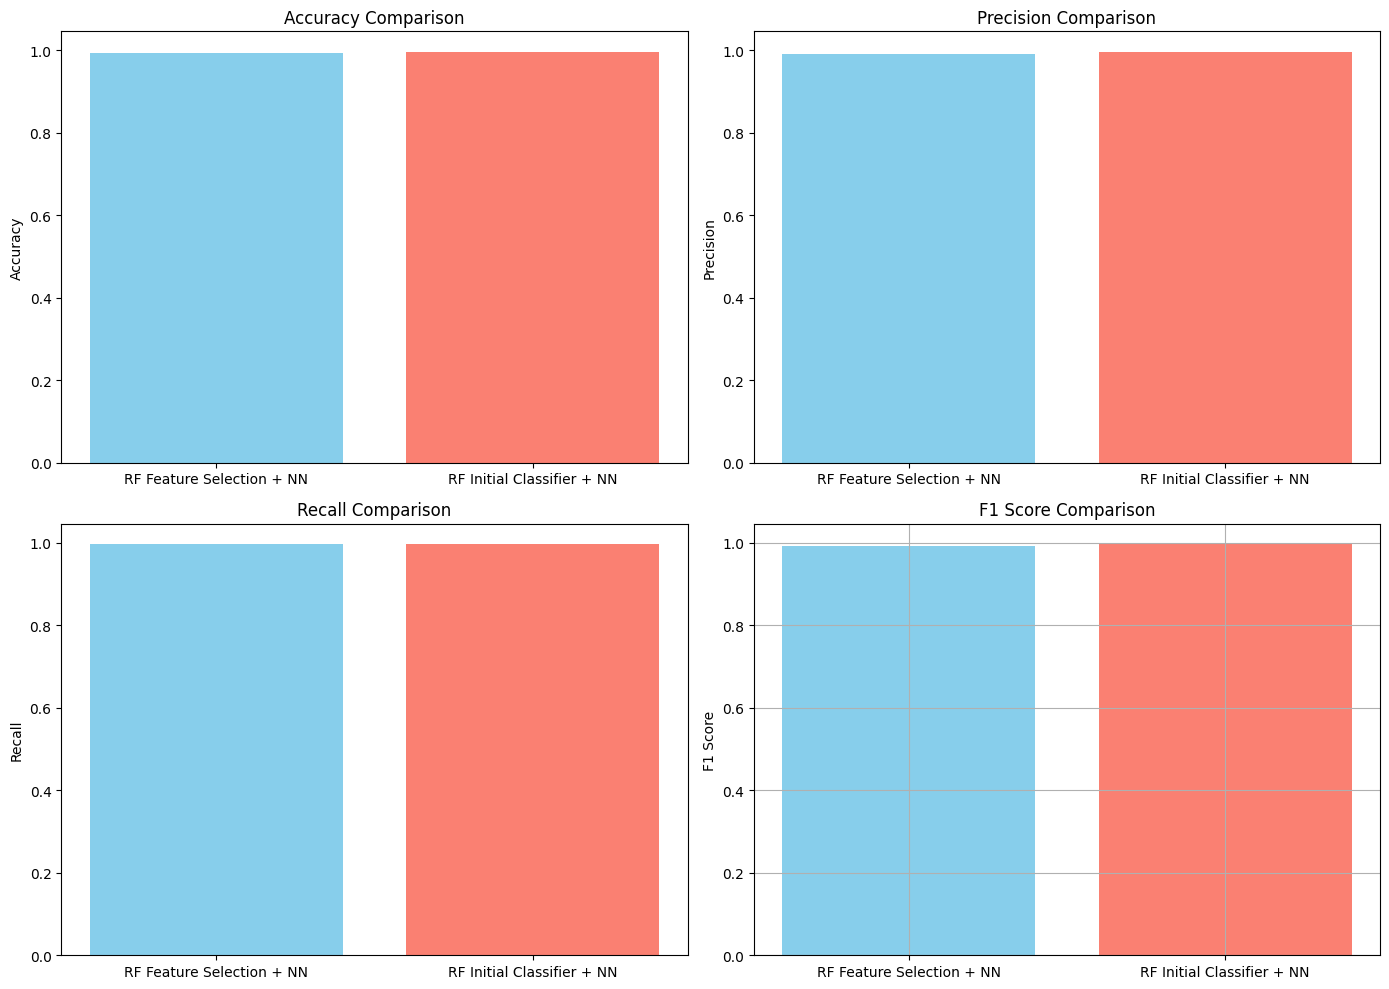

In [49]:
# Plotting the metrics comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot Accuracy
axes[0, 0].bar(metrics_df['Model'], metrics_df['Accuracy'], color=['skyblue', 'salmon'])
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')

# Plot Precision
axes[0, 1].bar(metrics_df['Model'], metrics_df['Precision'], color=['skyblue', 'salmon'])
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_ylabel('Precision')

# Plot Recall
axes[1, 0].bar(metrics_df['Model'], metrics_df['Recall'], color=['skyblue', 'salmon'])
axes[1, 0].set_title('Recall Comparison')
axes[1, 0].set_ylabel('Recall')

# Plot F1 Score
axes[1, 1].bar(metrics_df['Model'], metrics_df['F1 Score'], color=['skyblue', 'salmon'])
axes[1, 1].set_title('F1 Score Comparison')
axes[1, 1].set_ylabel('F1 Score')

# Adjust layout for clarity
plt.tight_layout()
plt.grid()
plt.show()

